In [1]:
import io #modulo para realizar distintas operaciones en Python.
import pandas as pd #Librería de análisis de datos.
import matplotlib.pyplot as plt #Libraría de representación de gráficas.
import seaborn as sb #Herramienta de visualización de datos.
import numpy as np #Numpy facilita un largo set de tipos de datos numéricos para construir arrays.
from scipy.stats import norm #Librería con herramientas y algoritmos matemáticos.
from scipy import stats 
from sklearn import svm #Librería con algoritmos de aprendizaje
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from pylab import rcParams
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

## Lectura de datos

In [2]:
#Read CSV 
wdbc = pd.read_csv(
    'wdbc.data',
    encoding='utf-8',
    delim_whitespace=False,
    names=["id","diagnostic",'mean radius', 'mean texture', 'mean perimter', 'mean area', 'mean smoothnesss', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symetry','mean fractal dimension','se radius', 'se texture', 'se perimter', 'se area', 'se smoothnesss', 'se compactness', 'se concavity', 'se concave points', 'se symetry','se fractal dimension''worst radius', 'worst texture', 'worst perimter', 'worst area', 'worst smoothnesss', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symetry','worst fractal dimension'],
    index_col=False,
    header=None,
)
display(wdbc)

,id,diagnostic,mean radius,mean texture,mean perimter,mean area,mean smoothnesss,mean compactness,mean concavity,mean concave points,...,se fractal dimensionworst radius,worst texture,worst perimter,worst area,worst smoothnesss,worst compactness,worst concavity,worst concave points,worst symetry,worst fractal dimension
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366


In [3]:
#Separación de las columnas no utilizadas para crear un modelo
wdbc=wdbc.drop(['id', 'diagnostic'],axis=1)

## Identificación de Anomalías - Isolation Forest

In [4]:
#Modelo
model=IsolationForest(n_estimators=100, max_samples=256, contamination=0.2, max_features=1.0, bootstrap=False, n_jobs=-1, random_state=2019,verbose=0, behaviour="new")
model.fit(wdbc)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.2,
        max_features=1.0, max_samples=256, n_estimators=100, n_jobs=-1,
        random_state=2019, verbose=0)

(array([  3.,   3.,   6.,   7.,  18.,  41.,  54., 115., 186., 136.]),
 array([-0.20259888, -0.17287623, -0.14315358, -0.11343094, -0.08370829,
        -0.05398565, -0.024263  ,  0.00545965,  0.03518229,  0.06490494,
         0.09462758]),
 <a list of 10 Patch objects>)

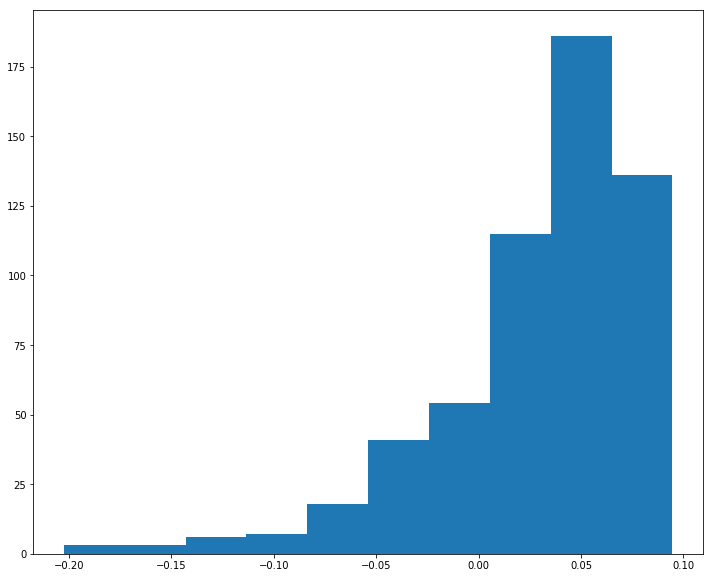

In [5]:
#Resultado tras el modelo aplicado
scores=model.decision_function(wdbc)
plt.figure(figsize=(12,10))
plt.hist(scores,bins=10)

In [6]:
#Labelizador según los resultados representados 
predwdbc=model.predict(wdbc)
len(predwdbc)
wdbc["label"]=predwdbc
display(wdbc)


,mean radius,mean texture,mean perimter,mean area,mean smoothnesss,mean compactness,mean concavity,mean concave points,mean symetry,mean fractal dimension,...,worst texture,worst perimter,worst area,worst smoothnesss,worst compactness,worst concavity,worst concave points,worst symetry,worst fractal dimension,label
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,-1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,-1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,-1
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,1
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,1
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,-1


## Muestras Anómalas

In [7]:
#Muestras anómalas
outliers=wdbc.loc[wdbc["label"]==-1]
outliers_index=list(outliers.index)
print(outliers_index)

[0, 3, 4, 9, 12, 18, 22, 23, 24, 25, 33, 38, 42, 45, 59, 60, 61, 63, 68, 71, 72, 77, 78, 82, 83, 95, 101, 105, 108, 112, 116, 119, 122, 138, 140, 146, 151, 152, 161, 164, 175, 176, 178, 180, 181, 190, 192, 197, 202, 203, 210, 212, 213, 214, 219, 236, 237, 250, 252, 256, 257, 258, 259, 260, 265, 272, 288, 290, 300, 302, 307, 314, 318, 323, 339, 343, 351, 352, 366, 368, 369, 373, 376, 379, 382, 389, 391, 393, 400, 417, 424, 430, 461, 468, 473, 485, 489, 491, 503, 504, 505, 520, 521, 533, 538, 539, 557, 561, 562, 563, 564, 565, 567, 568]


In [8]:
#Número de muestras normales y muestras anómalas
print(wdbc["label"].value_counts())

 1    455
-1    114
Name: label, dtype: int64


## Visualización

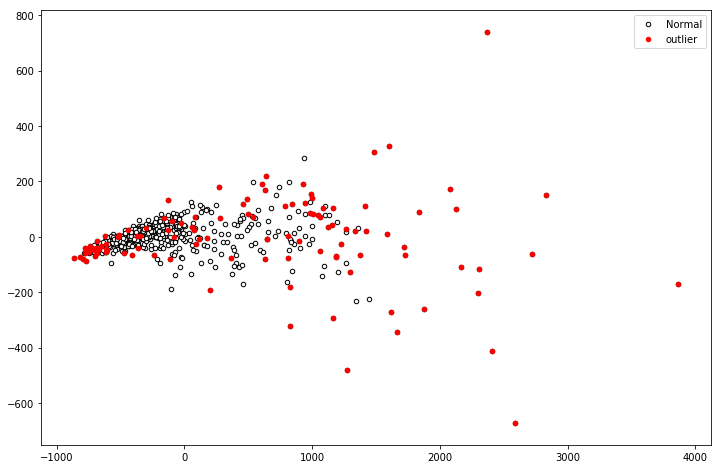

In [9]:
#Remover la etiqueta
wdbc=wdbc.drop(["label"],axis=1)
#Pasar las variables a dos dimensiones
pca=PCA(2)
pca.fit(wdbc)

#Array tras la transformación con PCA
principalDF=pd.DataFrame(data=pca.transform(wdbc), columns=["principal component 1", "principal component 2"])

#Valores
principalDF_values=principalDF.iloc[:,:].values

#Visualización
fig = plt.figure(figsize = (12,8))

b1=plt.scatter(principalDF_values[:,0],principalDF_values[:,1], c='white',s=20,edgecolor='k', label="Normal")
b1=plt.scatter(principalDF_values[outliers_index,0],principalDF_values[outliers_index,1], s=20, c="red", label="outlier")
plt.legend(loc="upper right")

plt.show()


## Comprobación resultados

In [10]:
wdbccomp = pd.read_csv(
    'wdbc.data',
    encoding='utf-8',
    delim_whitespace=False,
    names=["id","diagnostic",'mean radius', 'mean texture', 'mean perimter', 'mean area', 'mean smoothnesss', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symetry','mean fractal dimension','se radius', 'se texture', 'se perimter', 'se area', 'se smoothnesss', 'se compactness', 'se concavity', 'se concave points', 'se symetry','se fractal dimension''worst radius', 'worst texture', 'worst perimter', 'worst area', 'worst smoothnesss', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symetry','worst fractal dimension'],
    index_col=False,
    header=None,
)
wdbccomp["label"]=predwdbc
wdbccomp["label"][wdbccomp["label"].values==-1]="B"
wdbccomp["label"][wdbccomp["label"].values==1]="M"
wdbc_comparation=wdbccomp[["diagnostic","label"]]
wdbc_comparation

C:\Users\FedericoDamianEsteba\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,diagnostic,label
0,M,B
1,M,M
2,M,M
3,M,B
4,M,B
5,M,M
6,M,M
7,M,M
8,M,M
9,M,B


In [11]:
print(metrics.classification_report(wdbccomp["diagnostic"],wdbccomp["label"]))
print(metrics.confusion_matrix(wdbccomp["diagnostic"],wdbccomp["label"]),"\n")


              precision    recall  f1-score   support

           B       0.32      0.10      0.15       357
           M       0.29      0.63      0.40       212

   micro avg       0.30      0.30      0.30       569
   macro avg       0.31      0.37      0.28       569
weighted avg       0.31      0.30      0.25       569

[[ 36 321]
 [ 78 134]] 



## SVM

In [12]:
ocsvm=OneClassSVM(nu=0.25,gamma=0.05)
ocsvm.fit(wdbc)
predocsvm=ocsvm.predict(wdbc)


In [13]:
wdbc["labelsvm"]=predocsvm
display(wdbc)
#Muestras anómalas
outlierssvm=wdbc.loc[wdbc["labelsvm"]==-1]
outlierssvm_index=list(outlierssvm.index)
print(outlierssvm_index)

#Número de muestras normales y muestras anómalas
print(wdbc["labelsvm"].value_counts())

,mean radius,mean texture,mean perimter,mean area,mean smoothnesss,mean compactness,mean concavity,mean concave points,mean symetry,mean fractal dimension,...,worst texture,worst perimter,worst area,worst smoothnesss,worst compactness,worst concavity,worst concave points,worst symetry,worst fractal dimension,labelsvm
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,-1
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,1
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,1
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,-1
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,1
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,1
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,1
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,1
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,1


[0, 3, 11, 12, 13, 14, 15, 17, 20, 23, 24, 25, 26, 29, 31, 32, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 56, 57, 58, 59, 60, 62, 63, 64, 65, 68, 69, 70, 74, 80, 81, 85, 89, 90, 92, 93, 96, 103, 105, 106, 109, 110, 112, 113, 114, 116, 117, 118, 120, 125, 126, 129, 130, 131, 132, 134, 136, 138, 142, 143, 145, 148, 150, 152, 153, 156, 157, 158, 159, 160, 161, 162, 164, 165, 167, 168, 171, 172, 174, 175, 177, 178, 183, 184, 186, 187, 190, 191, 193, 194, 197, 198, 199, 200, 201, 202, 203, 205, 207, 208, 209, 212, 218, 219, 220, 222, 223, 224, 226, 228, 229, 230, 232, 233, 238, 239, 240, 241, 242, 245, 246, 247, 251, 253, 258, 260, 261, 262, 263, 264, 265, 269, 271, 273, 274, 277, 279, 281, 285, 286, 287, 289, 291, 292, 295, 297, 298, 299, 305, 306, 308, 309, 310, 311, 312, 313, 318, 320, 322, 327, 330, 331, 332, 336, 338, 339, 341, 343, 346, 350, 355, 357, 358, 359, 360, 361, 362, 363, 364, 366, 367, 374, 376, 377, 378, 382, 385, 386, 394, 395, 398, 401, 402, 403, 

In [14]:
wdbccomp2 = pd.read_csv(
    'wdbc.data',
    encoding='utf-8',
    delim_whitespace=False,
    names=["id","diagnostic",'mean radius', 'mean texture', 'mean perimter', 'mean area', 'mean smoothnesss', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symetry','mean fractal dimension','se radius', 'se texture', 'se perimter', 'se area', 'se smoothnesss', 'se compactness', 'se concavity', 'se concave points', 'se symetry','se fractal dimension''worst radius', 'worst texture', 'worst perimter', 'worst area', 'worst smoothnesss', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symetry','worst fractal dimension'],
    index_col=False,
    header=None,
)
wdbccomp2["labelsvm"]=predocsvm
#for row in wdbccomp2.index:
#    if (wdbccomp2["labelsvm"])==-1:
#        wdbccomp2["labelsvm"]=["B"]
#    if (wdbccomp2["labelsvm"])==1:
#        wdbccomp2["labelsvm"]=["M"]
  

#for row in range(len(wdbccomp2)):
#    if wdbccomp2["labelsvm"][row]==-1:
#        wdbccomp2['labelsvm'][row]="B"
#    elif wdbccomp2["labelsvm"][row]==1:
#        wdbccomp2['labelsvm'][row]="M"


wdbccomp2["labelsvm"][wdbccomp2["labelsvm"]==-1]="B"
wdbccomp2["labelsvm"][wdbccomp2["labelsvm"]==1]="M"
wdbc_comparation2=wdbccomp2[["diagnostic","labelsvm"]]
display(wdbc_comparation2)


C:\Users\FedericoDamianEsteba\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\FedericoDamianEsteba\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,diagnostic,labelsvm
0,M,B
1,M,M
2,M,M
3,M,B
4,M,M
5,M,M
6,M,M
7,M,M
8,M,M
9,M,M


In [15]:

print(metrics.classification_report(wdbccomp2["diagnostic"],wdbccomp2["labelsvm"]))
print(metrics.confusion_matrix(wdbccomp2["diagnostic"],wdbccomp2["labelsvm"]),"\n")


              precision    recall  f1-score   support

           B       0.63      0.51      0.57       357
           M       0.38      0.50      0.43       212

   micro avg       0.51      0.51      0.51       569
   macro avg       0.51      0.51      0.50       569
weighted avg       0.54      0.51      0.52       569

[[182 175]
 [105 107]] 



### Test DBSCAN

In [16]:
wdbc=wdbc.drop(["labelsvm"],axis=1)
#display(wdbc)
scaler = MinMaxScaler()
wdbcscal=scaler.fit_transform(wdbc)
#display(wdbcscal)
modeldbscan=DBSCAN(eps=0.6, min_samples = 100).fit(wdbcscal)
print(modeldbscan)
outliers_dbscan=pd.DataFrame(wdbcscal)
clusters = modeldbscan.fit_predict(wdbcscal)


from collections import Counter
print (Counter(modeldbscan.labels_))

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=None, p=None)
Counter({0: 460, -1: 109})


## Conlcusion

Hay diferentes tipos de métodos para separar muestras anómalas basaados en agrupamientos y denssidades como DBSCAN.
Pero también otros como Isolation Forest y OneClassSVM derivado de las técnicas de árboles y SVM.

Es todavía un desafío saber que algoritmo es el más óptimo para detectar los distintos tipos de anomalías.
